<a href="https://colab.research.google.com/github/shrankhalas/Mangonet-using-VGG16/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layer
import keras
from keras.models import Sequential
from keras.utils import to_categorical
import os
import zipfile
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mangodataset.zip to mangodataset.zip


In [ ]:
# Path to the uploaded file (make sure the filename matches exactly)
zip_path = "/content/mangodataset.zip"
# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/mango_data")  # Extract to a folder
# Now list the contents of the extracted folder
print(os.listdir("/content/mango_data"))


['Dataset']


In [ ]:
with zipfile.ZipFile("/content/mangodataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mangodataset")


In [ ]:
import os
print(os.listdir("/content"))

['.config', 'mangodataset.zip', 'mango_classifier_model.h5', 'mangodataset', 'mango_data', 'sample_data']


In [ ]:
base_dir = "/content/mangodataset/Dataset/Classification_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os
print(os.listdir(extract_path))

['Fajri', 'Dosehri', 'Langra', 'Chaunsa (White)', 'Sindhri', 'Anwar Ratool', 'Chaunsa (Black)', 'Dataset', 'Chaunsa (Summer Bahisht)']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1280 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


In [ ]:
train_data = datagen.flow_from_directory(
    '/content/mangodataset/Dataset/Classification_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


val_data = datagen.flow_from_directory(
    extract_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1600 images belonging to 8 classes.
Found 760 images belonging to 9 classes.


In [ ]:
print("Train samples:", train_data.samples)
print("Validation samples:", val_data.samples)
print("Class indices:", train_data.class_indices)

Train samples: 1600
Validation samples: 760
Class indices: {'Anwar Ratool': 0, 'Chaunsa (Black)': 1, 'Chaunsa (Summer Bahisht)': 2, 'Chaunsa (White)': 3, 'Dosehri': 4, 'Fajri': 5, 'Langra': 6, 'Sindhri': 7}


In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg.trainable = False  # Freeze the VGG16 layers


In [ ]:
x_batch, y_batch = next(train_data)
print("Image batch shape:", x_batch.shape)
print("Label batch shape:", y_batch.shape)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 8)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,528 (80.64 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.3018 - loss: 9.1028

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 9), output.shape=(None, 8)

In [ ]:
dataset_path = "/content/mango_data/Dataset/Classification_dataset"


In [ ]:
import os

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{class_name}: {num_images} images")


Classification_dataset: 0 images
Grading_dataset: 0 images


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

In [ ]:
def convolutional_model():
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    vgg.trainable = False

    model = Sequential()
    model.add(vgg)

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
num_classes = train_data.num_classes
model = convolutional_model()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,874,926 (56.74 MB)

 Trainable params: 160,238 (625.93 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 619ms/step - accuracy: 0.6482 - loss: 2.3864 - val_accuracy: 0.8659 - val_loss: 0.3380
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 591ms/step - accuracy: 0.8090 - loss: 0.5969 - val_accuracy: 0.9273 - val_loss: 0.1708
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.8948 - loss: 0.2770 - val_accuracy: 0.9545 - val_loss: 0.1100
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 591ms/step - accuracy: 0.9108 - loss: 0.2179 - val_accuracy: 0.9682 - val_loss: 0.0715
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 590ms/step - accuracy: 0.9450 - loss: 0.1430 - val_accuracy: 0.9864 - val_loss: 0.0424
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 571ms/step - accuracy: 0.9536 - loss: 0.1037 - val_accuracy: 0.9886 - val_loss: 0.0332
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 591ms/step - accuracy: 0.9692 - loss: 0.0794 - val_accuracy: 0.9932 - val_loss: 0.0368
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 650ms/step - accuracy: 0.9747 - loss: 0.0610 - val_accu

In [ ]:
model.save("mango_classifier_model.h5")

In [ ]:
import os

# Check inside the mango dataset
base_path = "/content"
for root, dirs, files in os.walk(base_path):
    for name in files:
        if "IMG_20210702_074756" in name:
            print(os.path.join(root, name))


/content/mango_data/Dataset/Classification_dataset/Langra/IMG_20210702_074756.jpg
/content/mango_data/Dataset/Classification_dataset/Dataset/Classification_dataset/Langra/IMG_20210702_074756.jpg


In [ ]:
img_path = "/content/mango_data/Dataset/Classification_dataset/Langra/IMG_20210702_074756.jpg"


In [ ]:

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

print("Predicted Mango Variety:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Mango Variety: Grading_dataset


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Mango Variety: Grading_dataset


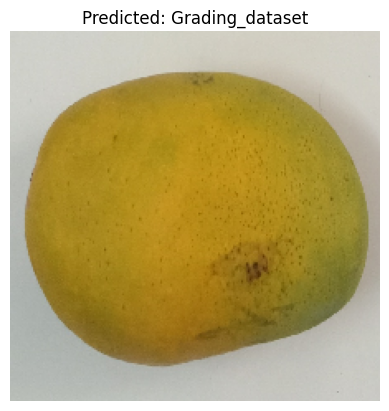

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace this with the correct path if needed
img_path = "/content/mango_data/Dataset/Grading_dataset/Class_I/IMG_20210703_151605.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict the variety
prediction = model.predict(img_array)
predicted_class = list(train_data.class_indices.keys())[np.argmax(prediction)]

# Display result
print("Predicted Mango Variety:", predicted_class)

# Optional: show the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
dataset_path = "/content/mango_data/Dataset/Classification_dataset/Dataset"


In [ ]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1760 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)


{'Classification_dataset': 0, 'Grading_dataset': 1}
